# Accessing and using astronomical data

## Simbad

In [1]:
from astroquery.simbad import Simbad
import astropy.units as u

In [2]:
# dir(Simbad)

In [3]:
objects_ids = Simbad.query_objectids('NGC 5036')
objects_ids

ID
bytes28
Gaia DR3 3636002906296214656
2dFGRS TGN135Z207
LEDA 46057
NGC 5036
NPM1G -03.0451
2MASX J13144283-0410424
6dFGS gJ131442.8-041043


In [4]:
Simbad.query_region("0 +0", radius=2 * u.arcmin)

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32
Fermi bn100227067,00 00.0,+00 00,3,3,--,--,0,E,G,2012ApJ...754..121F,1
SDSS J000004.21+000122.4,00 00 04.212,+00 01 22.40,7,7,--,--,0,C,,2013ApJ...763...88C,1
SDSS-II SN 14480,00 00 04.190,+00 01 22.66,7,7,--,--,0,C,O,2011ApJ...738..162S,1
QSO B2357-003A,23 59 59.9719,-00 01 58.291,14,14,0.261,0.163,90,A,O,2020yCat.1350....0G,1


## Example TAP queries

Get 5 papers from SIMBAD that have supernovae in their titles

In [5]:
Simbad.list_tables()

table_name,description
object,object
basic,General data about an astronomical object
ids,all names concatenated with pipe
alltypes,all object types concatenated with pipe
ident,Identifiers of an astronomical object
cat,Catalogues name
flux,Magnitude/Flux information about an astronomical object
allfluxes,"all flux/magnitudes U,B,V,I,J,H,K,u_,g_,r_,i_,z_"
filter,Description of a flux filter
has_ref,Associations between astronomical objects and their bibliographic references


In [6]:
Simbad.query_tap("select top 5 * from ref where title like '%supernovae%'")

abstract,bibcode,doi,journal,last_page,nbobject,oidbib,page,title,volume,year
object,object,object,object,int32,int32,int64,int32,object,int32,int16
"A toy model for gamma-ray burst supernovae (GRB SNe) is discussed by considering the coexistence of baryon-poor outflows from black holes (BHs) and a powerful spin connection to the surrounding disk, giving rise to consistent calorimetry as described by van Putten in a variant of the Blandford-Znajek (BZ) process. In this model the half-opening angle of the magnetic flux tube on the horizon is determined by the mapping relation between the angular coordinate on the BH horizon and the radial coordinate on the surrounding accretion disk. The GRB is powered by the baryon-poor outflows in the BZ process, and the associated SN is powered by a very small fraction of the spin energy transferred from the BH to the disk in the magnetic coupling process. The timescale of the GRB is fitted by the duration of the open magnetic flux on the horizon. It turns out that the data of several GRB SNe are well fitted with our model.",2005ApJ...619..420L,10.1086/426378,ApJ,426,6,185306,420,A toy model for gamma-ray bursts in type Ib/c supernovae.,619,2005
"Type Ia supernovae (SNe Ia) provide us with a unique tool for measuring extragalactic distances and determining cosmological parameters. As a result, the precise and effective calibration for peak luminosities of SNe Ia becomes extremely crucial and thus is critically scrutinized for cosmological explorations. In this Letter, we reveal clear evidence for a tight linear correlation between peak luminosities of SNe Ia and their B-V colors ~12 days after the {\em B} maximum denoted by {Delta}C_12_. By introducing such a novel color parameter, {Delta}C_12_, this empirical correlation allows us to uniformly standardize SNe Ia with decline rates {Delta}m_15_in the range of 0.8<{Delta}m_15_<2.0 and to reduce scatters in estimating their peak luminosities from ~0.5 mag to the levels of 0.18 and 0.12 mag in the {\em V} and {\em I} bands, respectively. For a sample of SNe Ia with insignificant reddenings of host galaxies [e.g., E(B-V)_host_{<~}0.06 mag], the scatter drops further to only 0.07 mag (or 3%-4% in distance), which is comparable to observational accuracies and is better than other calibrations for SNe Ia. This would impact observational and theoretical studies of SNe Ia and cosmological scales and parameters.",2005ApJ...620L..87W,10.1086/428774,ApJ,90,10,185402,87,A novel color parameter as a luminosity calibrator for type Ia supernovae.,620,2005
"We have analyzed the magnetic effects that may occur in rapidly rotating core collapse supernovae. We consider effects from both magnetic turbulence and the formation of magnetic bubbles. For magnetic turbulence we have made a perturbative analysis for our spherically symmetric, core-collapse supernova model that incorporates the buildup of magnetic field energy in the matter accreting onto the proto-neutron star shortly after collapse and bounce. This significantly modifies the pressure profile and increases the heating of the material above the proto-neutron star resulting in an explosion even in rotating stars that would not explode otherwise. Regarding magnetic bubbles, we show that a model with an initial uniform magnetic field ~10^8^ G and uniform angular velocity of ~0.1 rad/s can form magnetic bubbles due to the very nonhomologous nature of the collapse. It is estimated that the buoyancy of the bubbles causes matter in the proto-neutron star to rise, carrying neutrino-rich material to the neutron star surface. This increases the neutrino luminosity sufficiently at early times to achieve a successful neutrino-driven explosion. Both magnetic mechanisms thus provide new means for initiating a Type II core-collapse supernova.",2005ApJ...628..335W,10.1086/430297,ApJ,342,0,186544,335,On rapidly rotating magnetic core-collapse supernovae.,628,2005
"We report Si, C, N, Mg-Al, Ca, and Ti isotopic data for 

Get the five most cited stars

In [7]:
famous_stars = Simbad.query_tap("select top 5 main_id, ra, dec, nbref from basic where otype = 'Star..' order by nbref desc")
famous_stars

main_id,ra,dec,nbref
,deg,deg,
object,float64,float64,int32
V* CM Tau,83.63311445609,22.01448713834,5204
SN 1987A,83.86675,-69.26974166666668,4887
HD 226868,299.59031556498,35.20160680908,4286
* alf Lyr,279.234734787025,38.783688956244,2669
Granat 1915+105,288.798149,10.945807,2583


Get proper motion measurements for one of them

In [8]:
Simbad.query_tap("select main_id, mesPM.* from basic join mesPM on basic.oid = mesPM.oidref where main_id = 'HD 226868'")

main_id,bibcode,coosystem,mespos,oidref,pmde,pmde_err,pmde_err_prec,pmde_prec,pmra,pmra_err,pmra_err_prec,pmra_prec
,,,,,mas / yr,mas / yr,,,mas / yr,mas / yr,,
object,object,object,int16,int64,float32,float32,int16,int16,float32,float32,int16,int16
HD 226868,2020yCat.1350....0G,ICRS,1,2905066,-6.31,0.017,3,3,-3.812,0.015,3,3
HD 226868,2018yCat.1345....0G,ICRS,2,2905066,-6.171,0.054,3,3,-3.882,0.048,3,3
HD 226868,2007A&A...474..653V,ICRS,3,2905066,-7.15,0.86,2,2,-3.37,0.75,2,2
HD 226868,1997A&A...323L..49P,ICRS,4,2905066,-7.62,0.91,2,2,-3.82,0.79,2,2


## ipyaladin

https://aladin.cds.unistra.fr/

In [9]:
from ipyaladin import Aladin

In [10]:
aladin = Aladin()
aladin

Aladin(options=['allow_full_zoomout', 'coo_frame', 'fov', 'full_screen', 'log', 'overlay_survey', 'overlay_sur…

In [11]:
aladin.add_table(famous_stars)

In [12]:
aladin.height = 600

## VizieR

In [13]:
from astroquery.vizier import Vizier

In [14]:
catalogs = Vizier.find_catalogs("pluto", max_catalogs=None)
[(catalog, content.description) for catalog, content in catalogs.items()]

[('VI/155', 'Topocentric positions of Pluto (Eglitis+, 2018)'),
 ('J/A+A/383/1054',
  'Astrometry of Pluto and Saturn in 1995-2001 (Rapaport+, 2002)'),
 ('J/A+A/515/A32',
  'Pluto, Charon, Nix, Hydra occultations 2008-15 (Assafin+, 2010)'),
 ('J/A+A/553/A14',
  "Pluto's observations between 1997 and 2010 (Beauvalet+, 2013)"),
 ('J/A+A/570/A86',
  'Pluto astrometry from 19yrs observations (Benedetti-Rossi+, 2014)'),
 ('J/A+A/609/A117',
  'CARMENES radial velocity curves of 7 M-dwarf (Trifonov+, 2018)'),
 ('J/A+A/609/L5', 'HD147379 b velocity curve (Reiners+, 2018)'),
 ('J/A+A/612/A49', '324 CARMENES M dwarfs velocities (Reiners+, 2018)'),
 ('J/A+A/617/L5',
  'Water delivery in Pluto and Triton atmospheres (Poppe+, 2018)'),
 ('J/A+AS/118/105', "Pluto 1991-1994 observations (Ryl'kov+, 1996)"),
 ('J/AJ/149/22',
  'Astrometry of Pluto from 1930-1951 observations (Buie+, 2015)'),
 ('J/AJ/152/80',
  'Astrometry of Pluto and trans-Neptunian objects (Holman+, 2016)'),
 ('J/AJ/159/74',
  'Disk-r

In [15]:
catalogs = Vizier.find_catalogs("arp's peculiar galaxies", max_catalogs=None)
[(catalog, content.description) for catalog, content in catalogs.items()]

[('VII/192', "Arp's Peculiar Galaxies (Webb 1996)")]

In [16]:
arp = Vizier(row_limit=-1).get_catalogs("VII/192")

In [17]:
arp

TableList with 2 tables:
	'0:VII/192/arpord' with 12 column(s) and 338 row(s) 
	'1:VII/192/arplist' with 13 column(s) and 592 row(s) 

In [18]:
arp[1]

Arp,Name,VT,u_VT,dim1,dim2,u_dim2,MType,Uchart,RAJ2000,DEJ2000,Simbad,NED
,,mag,,arcmin,arcmin,,,,,,,
int16,str16,float32,str1,float32,float32,str1,str14,int16,str10,str9,str6,str3
249,UGC 12891,16.2,,--,--,,,--,00 00 19.3,+22 59 26,Simbad,NED
249,UGC 12891,16.2,,1.3,0.5,,,--,00 00 21.6,+22 59 42,Simbad,NED
112,NGC 7805,13.3,,1.2,0.9,,SAB0^0: pec,89,00 01 26.9,+31 26 02,Simbad,NED
112,NGC 7806,13.5,,1.1,0.8,,SA(rs)bc? pec,89,00 01 30.2,+31 26 33,Simbad,NED
130,IC 5378,15.6,,0.5,--,,SBc,--,00 02 37.7,+16 39 08,Simbad,NED
130,IC 5378,15.3,,--,--,,E,--,00 02 37.8,+16 38 37,Simbad,NED
51,MGC-02-01-24,15.0,,0.8,--,,,--,00 06 16.8,-13 26 53,Simbad,NED
144,NGC 7828,14.4,,0.9,0.5,,Ring A,260,00 06 27.1,-13 24 58,Simbad,NED


In [19]:
aladin.add_table(arp[1])

### Vizier spectra and images

In [20]:
from pyvo import registry, dal

In [21]:
viztapdata = dal.TAPService("http://cdsarc.cds.unistra.fr/saadavizier.tap/tap")

In [22]:
sample = viztapdata.search("select top 1 * from obscore")

In [23]:
sample.fieldnames

('access_estsize',
 'access_format',
 'access_url',
 'bib_reference',
 'calib_level',
 'dataproduct_type',
 'em_band',
 'em_max',
 'em_min',
 'extension',
 'facility_name',
 'has_wcs',
 'instrument_name',
 'obs_collection',
 'obs_id',
 'obs_publisher_did',
 'oidsaada',
 'o_ucd',
 'pol_states',
 's_dec',
 's_fov',
 's_ra',
 's_region',
 's_resolution',
 'target_name',
 't_exptime',
 't_max',
 't_min',
 't_resolution')

In [24]:
count = viztapdata.search("select count(*), dataproduct_type from obscore group by dataproduct_type")
count

<Table length=2>
COUNT_ALL dataproduct_type
  int64        object     
--------- ----------------
  8324247         spectrum
    50076            image

In [26]:
images = viztapdata.search("select top 10 * from obscore where dataproduct_type = 'image' and has_wcs = 1")
images

<Table length=10>
access_estsize  access_format                                   access_url                                ...       t_min        t_resolution
    kbyte                                                                                                 ...                                
    int64           object                                        object                                  ...      float64         float64   
-------------- ---------------- ------------------------------------------------------------------------- ... ------------------ ------------
      68086080 application/fits https://cdsarc.cds.unistra.fr/saadavizier/download?oid=864974209749614593 ...            52553.0           --
      68086080 application/fits https://cdsarc.cds.unistra.fr/saadavizier/download?oid=864974209749614595 ...            52553.0           --
      68086080 application/fits https://cdsarc.cds.unistra.fr/saadavizier/download?oid=864974209749614596 ...            52553.0  

## Discovering TAP endpoints

In [27]:
tapmars = registry.search(registry.Freetext('mars'), registry.Servicetype('tap'))
tapmars

<Table length=5>
        ivoid               res_type           short_name       ...      standard_ids       intf_types  intf_roles
                                                                ...                                               
        object               object              object         ...         object            object      object  
---------------------- ----------------- ---------------------- ... ---------------------- ------------ ----------
   ivo://bira-iasb/tap vs:catalogservice          BIRA-IASB TAP ... ivo://ivoa.net/std/tap vs:paramhttp        std
ivo://cdpp/transplanet vs:catalogservice       PSWS Transplanet ... ivo://ivoa.net/std/tap vs:paramhttp        std
   ivo://jacobsuni/tap vs:catalogservice JacobsUni EPN node TAP ... ivo://ivoa.net/std/tap vs:paramhttp        std
 ivo://lmd.jussieu/tap vs:catalogservice                LMD TAP ... ivo://ivoa.net/std/tap vs:paramhttp        std
     ivo://pds-ppi/tap vs:catalogservice            PDS-PPI TAP

In [28]:
tapmars[0].describe()

VESPA PA team server TAP service
Short Name: BIRA-IASB TAP
IVOA Identifier: ivo://bira-iasb/tap
Access modes: tap
Base URL: http://vespa-ae.oma.be/tap

The VESPA PA team server's TAP end point. The Table Access Protocol (TAP) lets
you execute queries against our database tables, inspect various metadata, and
upload your own data. It is thus the VO's premier way to access public data
holdings.

Tables exposed through this endpoint include: epn_core from the gem_mars
schema, obscore from the ivoa schema, epn_core from the nomad schema, epn_core
from the soir schema, columns, groups, key_columns, keys, schemas, tables from
the tap_schema schema.

Subjects: BIRA-IASB TAP
Waveband Coverage:


In [29]:
tapmars[0].access_url

'http://vespa-ae.oma.be/tap'

## MOCs

In [30]:
from mocpy import MOC
from astroquery.mocserver import MOCServer

In [31]:
Vizier.find_catalogs("sdss dr12")

OrderedDict([('V/147', </>),
             ('J/ApJ/807/178', </>),
             ('J/ApJ/835/161', </>),
             ('J/ApJ/888/85', </>),
             ('J/ApJ/901/93', </>),
             ('J/ApJS/225/23', </>),
             ('J/ApJS/228/9', </>),
             ('J/ApJS/229/39', </>),
             ('J/A+A/583/A86', </>),
             ('J/A+A/596/A14', </>),
             ('J/PASP/130/H4203', </>),
             ('J/MNRAS/452/4153', </>),
             ('J/MNRAS/455/3413', </>),
             ('J/MNRAS/469/2102', </>)])

In [32]:
Vizier.get_catalogs("V/147")

TableList with 1 tables:
	'0:V/147/sdss12' with 23 column(s) and 50 row(s) 

In [33]:
moc_vizier = MOC.from_vizier_table("V/147/sdss12")

In [34]:
# moc_vizier

In [35]:
MOC.order_to_spatial_resolution(15).degree

0.0017893158394882323

In [36]:
aladin.add_moc_from_dict(moc_vizier.serialize("json"))

In [37]:
MOCServer.query_region(region=moc_vizier, intersect='encloses')

obs_title_18,hips_service_url_2,obs_title_17,obs_ack,obs_release_date,hips_rgb_red,obs_title_5,hips_tile_format_2,obs_title_26,hips_service_url_3,hips_creation_date,obs_copyright,web_access_url,hipsgen_params,data_bunit,ID,hips_progenitor_url,em_min,hips_service_url_5,sia_service_url,sia2_service_url,hips_doi,hips_nb_tiles,client_tap_mainlist,hips_service_url_1,obs_title_25,tap_tablename,moc_sky_fraction,prov_did,client_category,hips_rgb_blue,obs_title_16,hips_cube_firstframe,bib_reference_url,nb_rows,ohips_frame,hips_frame,hips_publisher,obs_title_10,hips_pixel_scale,moc_access_url,creator_did,hips_tile_width,obs_initial_dec,hips_creator,hipsgen_params_2,hipsgen_params_8,tap_service_url,obs_title_28,publisher_id,s_pixel_scale,t_max,hipsgen_date_4,obs_title_7,hipsgen_params_9,hipsgen_date_10,obs_title_12,cs_service_url,vizier_popularity,hipsgen_date_3,obs_title_23,obs_title_24,hipsgen_date_1,obs_title_9,data_ucd,obs_title_8,obs_regime,TIMESTAMP,obs_collection_label,glutag,hipsgen_date_7,hips_creation_date_1,hips_overlay,creator,hipsgen_date_9,obs_title_13,moc_type,hipsgen_params_12,obs_title_29,obs_title_15,obs_title_19,obs_initial_ra,data_cube_bunit3,publisher_did,hips_pixel_bitpix,client_sort_key,obs_title,moc_time_range,obs_title_3,dataproduct_subtype,hips_order_min,hips_skyval_method,obs_acknowledgement,hips_rgb_green,hips_initial_fov,dataproduct_type,hipsgen_date_12,hips_initial_ra,em_max,obs_copyright_url,obs_astronomy_kw,hips_check_code,obs_mission,data_cube_crval3,hips_release_date,hipsgen_params_1,hipsgen_params_4,obs_description,hips_service_url_4,client_link,bib_reference,hips_data_range,obs_title_20,obs_title_21,hips_skyval_value,obs_title_2,hips_status,hipsgen_params_3,hipsgen_params_11,hips_sampling,hips_status_4,hips_skyval,data_pixel_bitpix,obs_title_27,hips_status_2,hipsgen_date,hips_order,moc_order,obs_copyright_1,ssa_service_url,data_cube_cdelt3,hips_status_5,hipsgen_params_6,obs_title_1,hips_version,hipsgen_params_7,obs_title_4,prov_progenitor,obs_title_14,hipsgen_date_8,hips_initial_dec,sia2_glutag,hipsgen_date_6,obs_id,hipsgen_date_5,hipsgen_date_2,hipsgen_date_11,moc_release_date,obs_title_11,hips_release_date_1,hips_cat_nrows,obs_title_0,t_min,hipsgen_params_5,obs_description_url,client_application,obs_collection,hips_copyright,hips_pixel_cut,obs_title_6,hips_hierarchy,hips_cube_depth,MOCSERVER_REMOVE,hips_estsize,hips_tile_format_1,hips_status_1,obs_initial_fov,data_cube_crpix3,hipsgen_params_10,hips_builder,hips_service_url,obs_label,moc_time_order,hips_status_3,obs_copyright_url_1,hips_tile_format,hips_master_url,obs_title_22
str31,str73,str31,str1530,str20,str70,str31,str4,str31,str55,object,object,str88,str1333,str14,str49,str58,float64,str34,str96,str68,str28,float64,str4,str81,str31,str22,float64,str24,str50,str82,str31,float64,str86,float64,str10,str10,str42,str31,object,str88,str55,float64,float64,str35,str429,str206,str41,str31,str9,float64,float64,str17,str31,str258,str17,str31,str88,float64,str17,str31,str31,str17,str31,object,str31,object,float64,object,str6,str17,str17,str4,str56,str17,str31,str5,str47,str31,str31,str31,float64,str4,str48,float64,str15,str91,float64,str31,str5,float64,str6,str44,str82,float64,str7,str17,float64,float64,object,object,str30,str9,object,str20,str1374,str429,object,str47,object,str43,str18,str31,str31,str73,str31,str26,str429,str26,str8,str24,str4,float64,str31,str24,object,float64,float64,str4,str53,float64,str24,str259,str31,float64,str225,str31,str138,str31,str17,float64,str4,str17,str22,str17,str17,str17,str17,str31,str17,float64,str31,float64,str281,str62,object,object,str123,str18,str31,object,float64,str4,object,str8,str26,float64,float64,str258,object,str92,str8,float64,str24,str53,str13,str77,str31
DM simbad-biblio pub-dates 2009,--,DM simbad-biblio pub-dates 2008,--,--,--,DM simbad-biblio pub-dates 1996,--,DM simbad-biblio pub-dates 2017,--,2019-11-05T12:56Z,© Université de Strasbourg - CNRS. All rights reserved,--,in=/data/hips-simbad/data/simbad-bi

In [38]:
moc_cone = MOC.from_cone(0 * u.deg, 0* u.deg, 2 * u.deg, max_depth=14) + MOC.from_cone(1 * u.deg, 1 * u.deg, 2 * u.deg, max_depth=14)
moc_cone

5/4864 
6/17405-17407 18090-18091 18094 18773 19460 
7/69619 72352 72354-72356 72358-72359 72370 72382 75088-75089 75091 75100-75101 
 75103 77844 77846 77848-77850 
8/278470-278471 278473 278475 289413-289415 289428 289430-289431 289474 289484 
 289486-289487 289522 300361 300363 300388-300389 300391 300408-300409 
 311404-311406 311408-311410 311416 311444-311445 311488 
9/1113579 1113582-1113583 1113594-1113595 1113598-1113599 1113815 1113821 
 1113823 1113845 1113847 1113853 1113855 1113871 1113875 1113877-1113879 
 1113891 1113897-1113899 1157290 1157650-1157651 1157718-1157719 1157890 
 1157900 1157902-1157903 1157942 1157994 1158080 1158082-1158083 1158092 
 1158094 1158136 1158138 1201237 1201441 1201443 1201541 1201561 1201589 
 1201644-1201645 1202005 1245520 1245522 1245528 1245530 1245552 1245554 
 1245560 1245562 1245628-1245630 1245644-1245646 1245648 1245668 1245672 
 1245696-1245697 1245700-1245701 1245712-1245713 1245716 1245760-1245761 
 1245764-1245765 1245767 124595

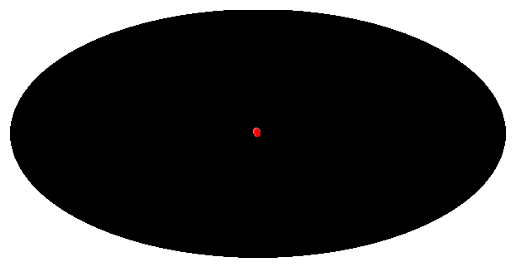

In [39]:
moc_cone.display_preview()

In [40]:
import matplotlib.pyplot as plt

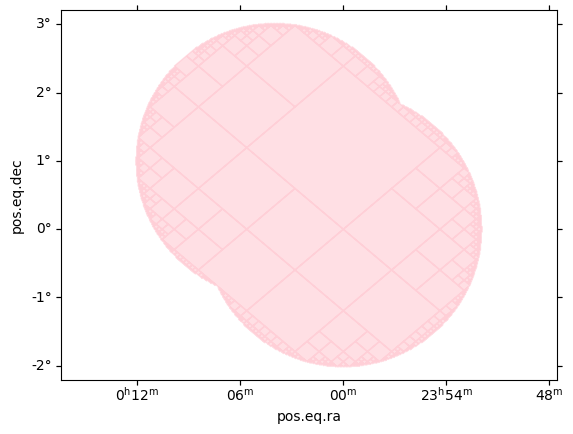

In [41]:
fig = plt.figure()
wcs = moc_cone.wcs(fig)
ax = fig.add_subplot(projection=wcs)
moc_cone.fill(ax=ax, wcs = wcs, color='pink', alpha = 0.5)

In [42]:
arp[1][0]

Arp,Name,VT,u_VT,dim1,dim2,u_dim2,MType,Uchart,RAJ2000,DEJ2000,Simbad,NED
,,mag,,arcmin,arcmin,,,,,,,
int16,str16,float32,str1,float32,float32,str1,str14,int16,str10,str9,str6,str3
249,UGC 12891,16.2,,--,--,,,--,00 00 19.3,+22 59 26,Simbad,NED


In [43]:
moc_cone.intersection(moc_vizier)

5/4864 
6/17405-17407 18090-18091 18094 18773 19460 
7/69619 72352 72354-72356 72358-72359 72370 72382 75088-75089 75091 75100-75101 
 75103 77844 77846 77848-77850 
8/278470-278471 278473 278475 289413-289415 289428 289430-289431 289474 289484 
 289486-289487 289522 300361 300363 300388-300389 300391 300408-300409 
 311404-311406 311408-311410 311416 311444-311445 311488 
9/1113579 1113582-1113583 1113594-1113595 1113598-1113599 1113815 1113821 
 1113823 1113845 1113847 1113853 1113855 1113871 1113875 1113877-1113879 
 1113891 1113897-1113899 1157290 1157650-1157651 1157718-1157719 1157890 
 1157900 1157902-1157903 1157942 1157994 1158080 1158082-1158083 1158092 
 1158094 1158136 1158138 1201237 1201441 1201443 1201541 1201561 1201589 
 1201644-1201645 1202005 1245520 1245522 1245528 1245530 1245552 1245554 
 1245560 1245562 1245628-1245630 1245644-1245646 1245648 1245668 1245672 
 1245696-1245697 1245700-1245701 1245712-1245713 1245716 1245760-1245761 
 1245764-1245765 1245767 124595

In [44]:
aladin.add_moc_from_dict(moc_cone.serialize("json"))